# AB-тестирование
## Задание AB.2


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---
**Баллы за задание:**

* Задача 1 — 20 баллов
* Задача 2 — 30 баллов
* Задача 3 — 60 баллов
* Задача 4 — 30 баллов
* Задача 5 — 50 баллов
* Задача 6 — 50 баллов

In [223]:
# Bot check

# HW_ID: ds_ab2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [224]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

from statsmodels.stats.proportion import proportion_confint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from statsmodels.formula.api import ols

sns.set(palette='Set2', style='whitegrid', font_scale=1.2)

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

## CUPED

---
### Задача 1.

Пусть в АБ-тесте использовались две независимые группы одинакового размера. Рассмотрим модель $y(t) = \theta_0 + \theta_1 t$, где $t \in \{0, 1\}$ &mdash; номер группы, а $y(t)$ &mdash; целевая метрика.

Покажите, что рассмотренный нами t-test для сравнения этих групп эквивалентен критерию Вальда для проверки гипотезы $\mathsf{H}_0\colon \theta_1=0$ при использовании оценки Уайта HC0, устойчивой к гетероскедастичности. В качестве остатков нужно рассматривать исходные остатки без поправки.

$X = X_1, ..., X_n$ -- тест

$Y = Y_1, ..., Y_n$ -- контроль


$\square$


Применим абсолютный t-test для выборок:

$$
T(X, Y) = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{S^2_X}{n} + \frac{S^2_Y}{n}}} \rightarrow^d N(0, 1)
$$

Теперь займемся критерием Вальда.

Возьмем в качестве оценок средние(т.е. функция потерь -- МНК):
$$\hat{\theta_0} = \overline{Y}$$

$$\hat{\theta_1} = \overline{X} - \overline{Y}$$

Тогда гипотеза $H_0: \theta_1 = 0$  эквивалентна равенству двух средних

Для оценки Уайта введем (матрица для предсказания X и Y через модель):
$$T = 
\begin{bmatrix} 
1 & 0 \\ 
1 & 0 \\
\dots & \dots \\
1 & 0 \\
1 & 1 \\
\dots & \dots \\
1 & 1
\end{bmatrix}
$$

В качестве матрицы оценок дисперсий возьмем остатки без поправки:
$$V = \text{diag}\{e_1^2, ..., e_{2n}^2\}$$

где для $ i \in \overline{1, n}: e_i = X_i - \overline{X}$, 

для $i \in \overline{n + 1, 2n}: e_i = Y_i - \overline{Y}$

Тогда матрица оценки Уайта имеет вид:
$$
W = (T^TT)^{-1}T^TVT(T^TT)^{-1} = \begin{bmatrix} \frac{1}{n} & \frac{-1}{n} \\ \frac{-1}{n} & \frac{1}{2n} \end{bmatrix} * \begin{bmatrix} 
1 & 0 \\ 
1 & 0 \\
\dots & \dots \\
1 & 0 \\
1 & 1 \\
\dots & \dots \\
1 & 1
\end{bmatrix}^T \text{diag}\{e_1^2, ..., e_{2n}^2\} \begin{bmatrix} 
1 & 0 \\ 
1 & 0 \\
\dots & \dots \\
1 & 0 \\
1 & 1 \\
\dots & \dots \\
1 & 1
\end{bmatrix} \begin{bmatrix} \frac{1}{n} & \frac{-1}{n} \\ \frac{-1}{n} & \frac{1}{2n} \end{bmatrix} = \frac{1}{n}\begin{bmatrix} S^2_X & -S^2_X \\ -S^2_X & S^2_X + S^2_Y \end{bmatrix}
$$


Тогда, в силу свойств оценки Уайда, $\frac{S^2_X + S^2_Y}{n}$ является а.д. для а.н.о. $\hat{\theta}_1$

Тогда если автокорреляции отсутствуют, то выполнена асимптотическая нормальность оценки коэффициентов (при справедливости основной гипотезы):
$$
\sqrt{n}\hat{\theta}_1 \rightarrow^d N(0, B)
$$

где

$$
nW \rightarrow^P B
$$


Таким образом критерий Вальда для гипотезы $H_0: \theta_1 = 0$ имеет вид:

$$
\frac{\hat{\theta}_1}{\sqrt{\frac{S^2_X + S^2_Y}{n}}} \rightarrow N(0, 1)
$$

Что полностью совпадает с распределением t-test

$\blacksquare$

---
### Задача 2.

Рассмотрим модель линейной регрессии первого шага стандартного метода CUPED
$y(x) = \theta_0 + \theta_1 x$, где $x$ &mdash; ковариата, а $y(x)$ &mdash; целевая метрика.

Покажите, что оценка $\theta_1$ методом наименьших квадратов совпадает с коэффициентом стандартного CUPED-преобразования.

$\square$

Пусть $Y = Y_1,..., Y_n $ -- целевая выборка, $X = X_1,..., X_n$ -- ковариаты.


Обозначим

$$
L = \sum (Y_i - \theta_0 - \theta_1 X_i)^2
$$

Продиффренцируем по $\theta_0$:

$
\frac{\partial L}{\partial \theta_0} = -2n(\overline{Y} - \theta_0 - \theta_1 \overline{X}) = 0 \Rightarrow \hat{\theta}_0 = \overline{Y} - \hat{\theta}_1 \overline{X}
$

Теперь по $\theta_1$:

\begin{align*}
\frac{\partial L}{\partial \theta_1} &= \sum_{i} X_i Y_i - n\overline{X}\hat{\theta}_0 - n\overline{X^2}\hat{\theta}_1 \\
&= \sum_{i} X_i Y_i - n\overline{X}(\overline{Y} - \hat{\theta}_1 \overline{X}) - n\overline{X^2}\hat{\theta}_1 = 0
\end{align*}

Откуда:
$$
\hat{\theta}_1 = \frac{\frac{1}{n}\sum X_i Y_i - \overline{X} \ \overline{Y}}{\overline{X^2} - \overline{X}^2} \approx \frac{cov(X_1, Y_1)}{DX_1} = z
$$
где z -- константа стандартного CUPED преобразования


$\blacksquare$

---
### Задача 3.

Провалидируйте и сравните методы CUPED через линейную регрессию:

На занятии мы рассмотрели несколько методов обобщения CUPED с помощью линейной регрессии:
* стандартный двухшаговый,
* комбинированный одношаговый,
* комбинированный двухшаговый.

Провалидируйте эти методы по величине вероятности ошибки I рода и сравните их по мощности. В качестве данных рассмотрите
* простые искусственные данные из ноутбука с занятия,
* искусственные данные с нелинейной зависимостью от ковариаты и гетероскедастичностью.

In [225]:
total_size = 10_000  # Общее количество объектов в данных
sample_size = 200  # Размер выборки
n_iter = 1000  # Количество итераций семплирования 
alpha = 0.05  # теор вероятность ошибки первого рода

lw = 5  # Толщина линий на графиках

In [226]:
def generate_train_test_sample(
    sample_size=1000, shape=5, scale=1000, scale_factor=0.3
):
    '''
    Генерация всей совокупности объектов

    sample_size -- размер выборки
    shape -- параметр формы гамма-распределения
    scale -- масштаб данных
    scale_factor -- доля увеличения дисперсии на экспериментальном периоде

    Возвращает данные за предэкспериментальный и экспериментальный периоды.
    '''

    base = np.random.gamma(shape=shape, scale=scale, size=sample_size)

    data = pd.DataFrame()

    data['pilot'] = base + np.random.normal(
        size=sample_size,
        scale=base.std() * scale_factor
    )
    data['prepilot'] = base + np.random.normal(
        size=sample_size,
        scale=base.std() * scale_factor
    )

    return data


def generate_two_independent_samples(
    sample_size=1000, shape=5, scale=1000, scale_factor=0.3, generate_train_test_func=generate_train_test_sample
):
    '''
    Генерация двух независимых выборок

    sample_size -- размер каждой выборки
    shape -- параметр формы гамма-распределения
    scale -- масштаб данных
    scale_factor -- доля увеличения дисперсии на экспериментальном периоде

    Возвращает данные за предэкспериментальный и экспериментальный периоды.
    '''

    return [
        generate_train_test_func(
            sample_size=sample_size, shape=shape, scale=scale, scale_factor=scale_factor
        )
        for _ in range(2)
    ]

Возьмем из семинара функцию поэлементного CUPED преобразования

In [227]:
def estimate_power(
    test,
    generate_samples,
    n_iter=10000,
    sample_size=1000,
    effects_list=np.linspace(0, 0.1, 11),
    relative_effect=True,
    alpha=0.05,
    target_name="pilot",
):
    """
    Проведение серии тестов на искусственных выборках для оценки мощности.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effects_list -- список добавляемых эффектов
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    """

    powers = np.zeros(len(effects_list))
    left_bounds = np.zeros(len(effects_list))
    right_bounds = np.zeros(len(effects_list))

    for i, effect in tqdm(enumerate(effects_list), leave=False):
        powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(
            test,
            generate_samples,
            n_iter=n_iter,
            sample_size=sample_size,
            effect=effect,
            relative_effect=relative_effect,
            alpha=alpha,
            target_name=target_name,
            draw=False,
        )

    return powers, left_bounds, right_bounds


def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")

    return prob_reject, left_bound, right_bound


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
    title=None,
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                alpha=0.7,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15] * 2, [-0.15] * 2, color="green", alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def draw_power(
    powers,
    left_powers,
    right_powers,
    effects_list=np.linspace(0, 0.1, 11),
    label=None,
    title="Графики мощности",
    new_figure=False,
):
    """
    Построение и отрисовка графика мощности критерия.

    Аргументы:
    powers -- оценка мощности
    left_powers, right_powers -- границы соотв. дов. интервала
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    """

    if new_figure:
        plt.figure(figsize=(12, 8))

    plt.plot(effects_list, powers, label=label, lw=3)
    plt.fill_between(effects_list, left_powers, right_powers, alpha=0.3)

    if new_figure:
        plt.hlines(
            0.8,
            effects_list[0],
            effects_list[-1],
            color="black",
            alpha=0.5,
            label="Мощность 0.8 (пересечение — MDE)",
        )
    plt.legend()
    plt.xlabel("Размер относительного эффекта")
    plt.ylabel("Мощность")
    plt.title(title)


def add_effect(x, effect, target_name="pilot", relative_effect=True):
    """
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект
    target_name -- имя столбца с целевой метрикой
    relative_effect -- является ли эффект относительным или абсолютным

    Возвращает:
    x -- выборка с добавленным эффектом
    """

    x_copy = x.copy()
    if relative_effect:
        x_copy[target_name] *= 1 + effect
    else:
        x_copy[target_name] += effect

    return x_copy


def run_experiments(
    test,
    generate_samples,
    n_iter=10000,
    sample_size=1000,
    effect=0,
    relative_effect=True,
    alpha=0.05,
    target_name="pilot",
    draw=False,
    title=None,
    show_pvals=True,
):
    """
    Проведение серии AA-тестов на искусственных выборках.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effect -- размер добавляемого эффекта (для оценки мощности)
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    """

    n_rejects = 0  # количество отвержений H_0
    pvals = []  # значения p-value

    # Проведение экспериментов
    for _ in tqdm(range(n_iter), leave=False):
        # Генерируем выборки
        x_data, y_data = generate_samples(size=sample_size)

        # Добавляем эффект, если хотим оценить мощность
        x_data = add_effect(
            x_data, effect, target_name=target_name, relative_effect=relative_effect
        )

        # Применяем критерий
        pvals.append(test(x_data, y_data)[1])
        n_rejects += pvals[-1] < alpha

    # Оценка вероятности отвержения
    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)

    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(
            prob_reject,
            left_bound,
            right_bound,
            show_pvals,
            pvals,
            alpha,
            figsize,
            title,
        )

    return prob_reject, (left_bound, right_bound)


def cuped_ttest(
    x_data, y_data, target_name="pilot", covariate_name="prepilot", alpha=0.05, 
):
    """
    Абсолютный t-test.

    :param x_data: выборка вместе с информацией о cuped-преобразовании
    :param y_data: выборка вместе с информацией о cuped-преобразовании
    :param target_name: имя столбца с целевой метрикой
    :param covariate_name: имя столбца-ковариаты
    :param alpha: теор вероятность ошибки первого рода
    :return: статистика критерия, p-value
    """

    x_data, y_data = cuped_transform(
        x_data, y_data, target_name=target_name, covariate_name=covariate_name
    )
    return sps.ttest_ind(x_data["cuped"], y_data["cuped"])

In [228]:
def cuped_transform(
    x_data, y_data, target_name="pilot", covariate_name="prepilot", return_theta=False
):
    """
    Выполняет CUPED-преобразование.

    :param x_data: данные тестовой группы
    :param y_data: данные контрольной группы
    :param target_name: имя столбца с целевой метрикой
    :param covariate_name: имя столбца-ковариаты
    :param return_theta: возвращать ли значение theta
    :return: таблицы с добавленными столбцами и theta
    """

    theta = (
        np.cov(x_data[covariate_name], x_data[target_name])[0, 1]
        + np.cov(y_data[covariate_name], y_data[target_name])[0, 1]
    ) / (x_data[covariate_name].var(ddof=0) + y_data[covariate_name].var(ddof=0))

    x_data["cuped"] = x_data[target_name] - theta * x_data[covariate_name]
    y_data["cuped"] = y_data[target_name] - theta * y_data[covariate_name]

    if return_theta:
        return x_data, y_data, theta
    else:
        return x_data, y_data


Сначала разберемся с простыми искусственными данными.

In [229]:
x_data, y_data = generate_two_independent_samples(sample_size=sample_size)

Комбинированный одношаговый метод реализован за нас в семинарском ноутбуке(для этого надо взять `cuped = True`). 

In [230]:
def regression_ttest_one_step_comb(x_data, y_data, cuped=False, sample_name='pilot', 
                     treatment_name='treatment', covariate_names=[]):
    '''
    T-test с CUPED/без CUPED, реализованный через линейную регрессию
    
    Аргументы:
    x, y -- выборки одинакового размера
    :param cuped: применять ли cuped
    :param sample_name: имя столбца с целевым признаком
    :param covariate_names: массив имен столбцов-ковариат
    
    Возвращает:
    stat -- статистика критерия
    pvalue -- p-value критерия
    left_bound, right_bound -- границы дов. интервала
    '''
    
    # добавляем столбец с индикатором тестовой группы
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0
    # объединяем тест и контроль в один датасет
    data = pd.concat([x_data, y_data]).reset_index(drop=True)
    
    # определяем имена фичей, на которых будем обучать модель
    if cuped:
        feature_names = [treatment_name] + list(covariate_names)
    else:
        feature_names = [treatment_name]
    
    # обучаем модель
    model = ols(f'{sample_name} ~ '+ '+'.join(feature_names), data=data).fit(cov_type='HC3')
    # забираем таблицу с результатами
    summary = model.summary2().tables[1]
    # берем из таблицы нужные поля
    stat = summary.loc[treatment_name, 'z']
    pvalue = summary.loc[treatment_name, 'P>|z|']
    left_bound = summary.loc[treatment_name, '[0.025']
    right_bound = summary.loc[treatment_name, '0.975]']

    return stat, pvalue, left_bound, right_bound
    

Теперь реализуем стандартный двухшаговый метод

In [ ]:
def regression_ttest_two_step_standart(x_data, y_data, sample_name='pilot', 
                     treatment_name='treatment', covariate_names=[]):
    '''
    Аргументы:
    x, y -- выборки одинакового размера
    :param cuped: применять ли cuped
    :param sample_name: имя столбца с целевым признаком
    :param covariate_names: массив имен столбцов-ковариат
    
    Возвращает:
    stat -- статистика критерия
    pvalue -- p-value критерия
    left_bound, right_bound -- границы дов. интервала
    '''
    
    # добавляем столбец с индикатором тестовой группы
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0
    # объединяем тест и контроль в один датасет
    data = pd.concat([x_data, y_data]).reset_index(drop=True)
    
    # обучаем первую модель
    first_model = ols(f'{sample_name} ~ '+ '+'.join(covariate_names), data=data).fit(cov_type='HC3')

    # из первой модели нам нужен theta при ковариате
    theta = first_model.params[covariate_names[0]]
    #теперь добавляем в датасет cuped столбец

    data['cuped'] = data[sample_name] - theta * data[covariate_names[0]]
    # обучаем вторую модель
    second_model = ols(f'cuped ~ {treatment_name}', data=data).fit(cov_type='HC3')
    second_model_summary = second_model.summary2().tables[1]

    # берем из таблицы нужные поля
    stat = second_model_summary.loc[treatment_name, 'z']
    pvalue = second_model_summary.loc[treatment_name, 'P>|z|']
    left_bound = second_model_summary.loc[treatment_name, '[0.025']
    right_bound = second_model_summary.loc[treatment_name, '0.975]']

    return stat, pvalue, left_bound, right_bound
    

Двухшаговый комбинированный метод CUPED с использованием линейной регресии.

In [234]:
def regression_ttest_two_step_comb(x_data, y_data, sample_name='pilot', 
                     treatment_name='treatment', covariate_names=[]):
    '''
    T-test с CUPED/без CUPED, реализованный через линейную регрессию
    
    Аргументы:
    x, y -- выборки одинакового размера
    :param cuped: применять ли cuped
    :param sample_name: имя столбца с целевым признаком
    :param covariate_names: массив имен столбцов-ковариат
    
    Возвращает:
    stat -- статистика критерия
    pvalue -- p-value критерия
    left_bound, right_bound -- границы дов. интервала
    '''
    
    # добавляем столбец с индикатором тестовой группы
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0
    # объединяем тест и контроль в один датасет
    data = pd.concat([x_data, y_data]).reset_index(drop=True)
    
    # определяем имена фичей, на которых будем обучать модель
    feature_names = [treatment_name] + list(covariate_names)
    
    # обучаем модель
    first_model = ols(f'{sample_name} ~ '+ '+'.join(feature_names), data=data).fit(cov_type='HC3')

    # из первой модели нам нужен theta при ковариате
    theta = first_model.params[covariate_names[0]]
    #теперь добавляем в датасет cuped столбец
    data['cuped'] = data[sample_name] - theta * data[covariate_names[0]]

    # обучаем вторую модель
    second_model = ols(f'cuped ~ {treatment_name}', data=data).fit(cov_type='HC3')
    second_summary = second_model.summary2().tables[1]

    # берем из таблицы нужные поля
    stat = second_summary.loc[treatment_name, 'z']
    pvalue = second_summary.loc[treatment_name, 'P>|z|']
    left_bound = second_summary.loc[treatment_name, '[0.025']
    right_bound = second_summary.loc[treatment_name, '0.975]']

    return stat, pvalue, left_bound, right_bound

  0%|          | 0/1000 [00:00<?, ?it/s]

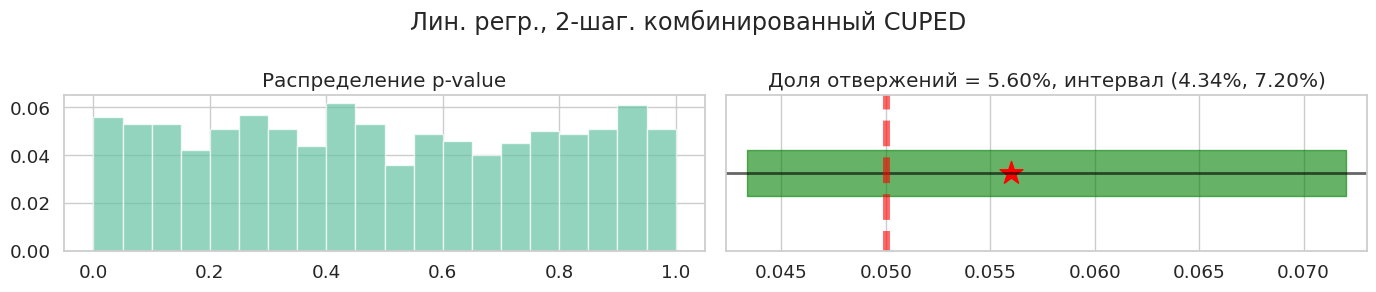

  0%|          | 0/1000 [00:00<?, ?it/s]

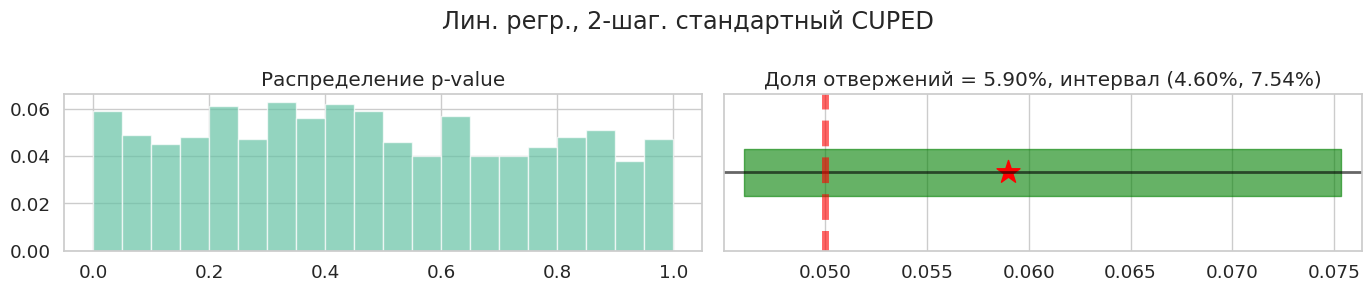

  0%|          | 0/1000 [00:00<?, ?it/s]

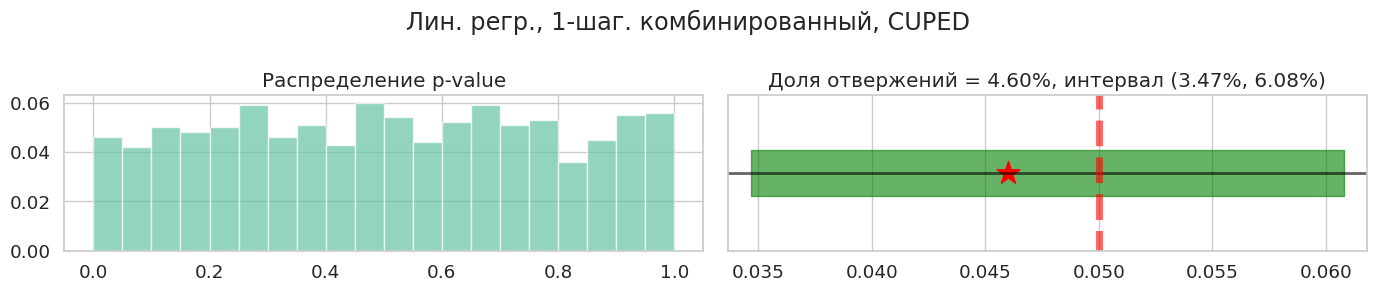

  0%|          | 0/1000 [00:00<?, ?it/s]

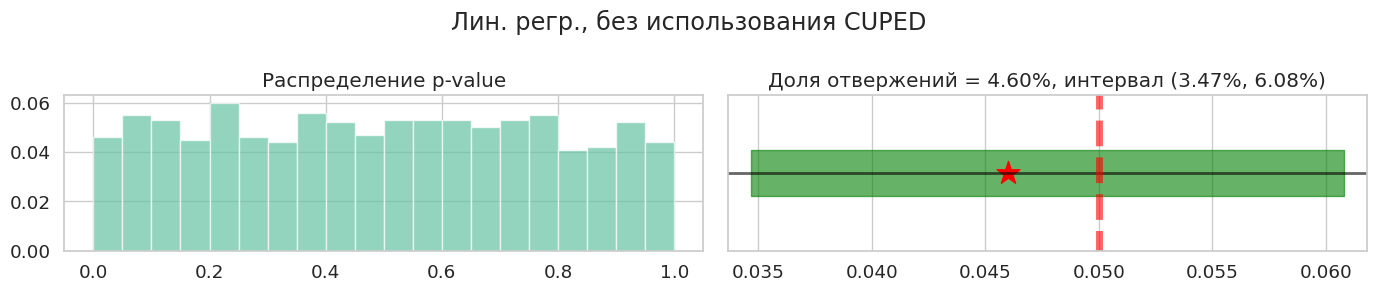

  0%|          | 0/1000 [00:00<?, ?it/s]

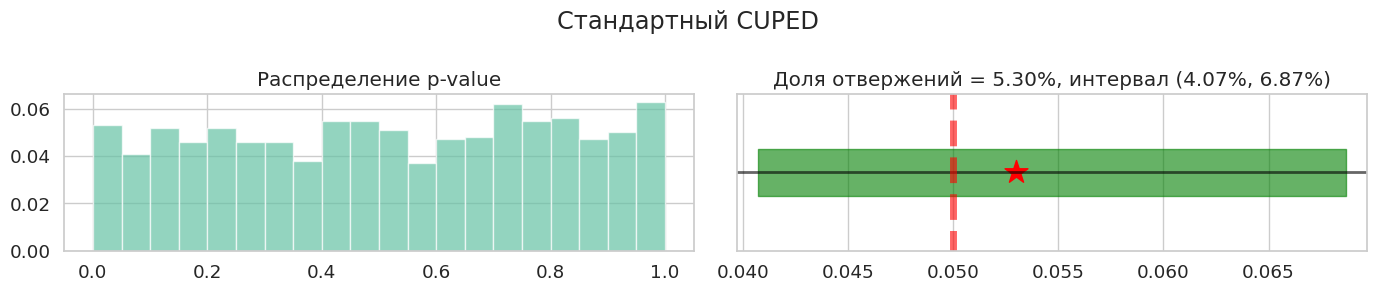

In [238]:
test_list = [
    lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=['prepilot']),
    lambda x, y: regression_ttest_two_step_standart(x, y, covariate_names=['prepilot']),
    lambda x, y: regression_ttest_one_step_comb(x, y, cuped=True, covariate_names=['prepilot']),
    regression_ttest_one_step_comb,
    cuped_ttest,
]

title_list = [
    'Лин. регр., 2-шаг. комбинированный CUPED',
    'Лин. регр., 2-шаг. стандартный CUPED',
    'Лин. регр., 1-шаг. комбинированный, CUPED',
    'Лин. регр., без использования CUPED',
    'Стандартный CUPED',
]

for test, title in zip(test_list, title_list):
    run_experiments(
        test=test,
        generate_samples = lambda size: generate_two_independent_samples(sample_size=size),
        sample_size=sample_size,
        n_iter=n_iter,
        draw=True,
        title=title,
    )

Теперь посчитаем мощности.

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

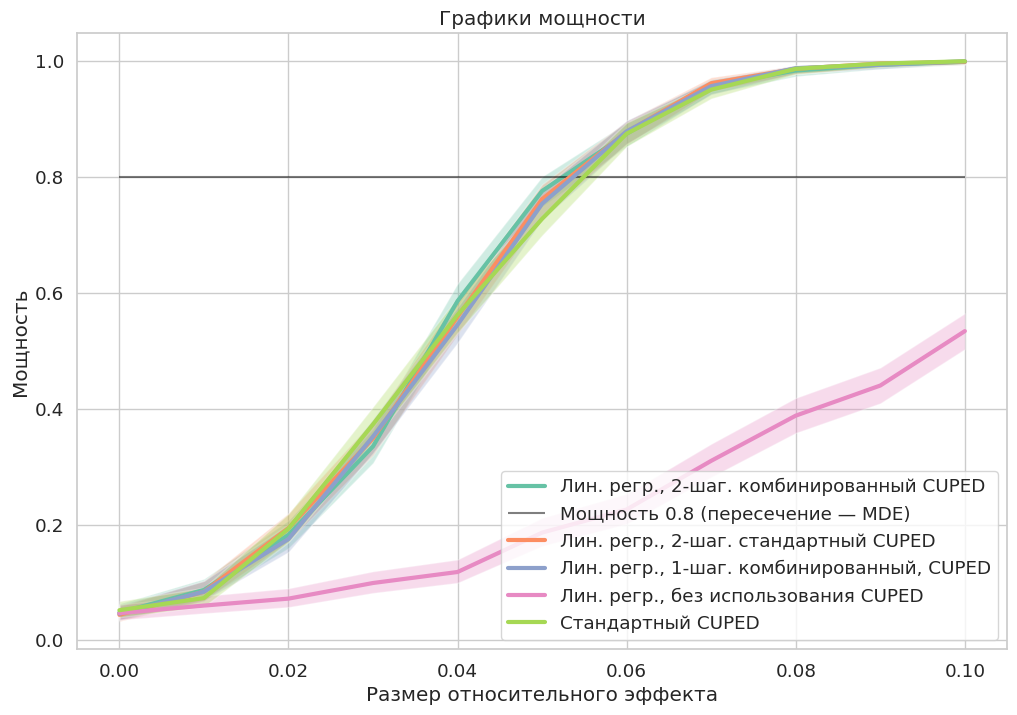

In [ ]:
for i, (test, title) in enumerate(zip(test_list, title_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples = lambda size: generate_two_independent_samples(sample_size=size),
        sample_size=sample_size,
        n_iter=n_iter,
    )
    
    draw_power(powers, left_bounds, right_bounds, label=title, new_figure=(i==0))

Теперь посмотрим на работу этих методов с гетероскедастичностью и нелинейной зависимостью от ковариаты.

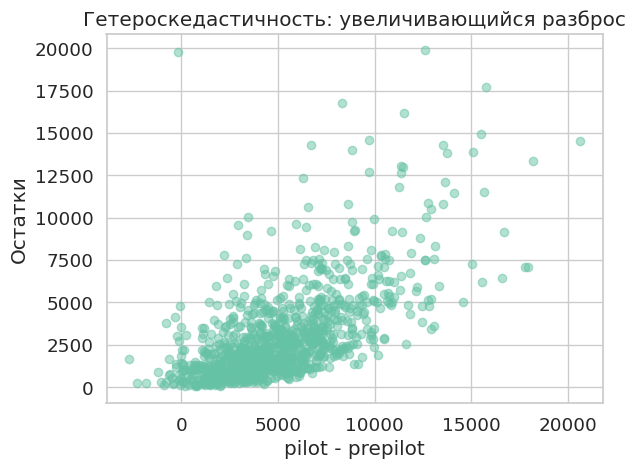

In [ ]:
def generate_nonlinear_train_test_sample(
    sample_size=1000, shape=5, scale=1000, scale_factor=0.3, noise_factor=0.5
):
    '''
    Генерация данных с нелинейной зависимостью от ковариаты и гетероскедастичностью.

    sample_size -- размер выборки
    shape -- параметр формы гамма-распределения
    scale -- масштаб данных
    scale_factor -- коэффициент увеличения дисперсии на экспериментальном периоде
    noise_factor -- коэффициент нелинейного шума

    Возвращает DataFrame с предэкспериментальным (prepilot) и экспериментальным (pilot) периодами.
    '''
    base = np.random.gamma(shape=shape, scale=scale, size=sample_size)
    
    # Нелинейная зависимость: добавляем квадратичный и синусоидальный компонент
    nonlinear_component = np.sin(base / scale) + 0.0001 * base**2
    
    # Гетероскедастичность: разброс увеличивается с ростом base
    heteroskedastic_noise = np.random.normal(
        loc=0, scale=base.std() * scale_factor * (1 + noise_factor * np.abs(base / scale)), size=sample_size
    )
    
    data = pd.DataFrame()
    data['prepilot'] = base + heteroskedastic_noise
    data['pilot'] = base + nonlinear_component + heteroskedastic_noise
    
    return data

# Генерируем данные
data = generate_nonlinear_train_test_sample(sample_size=1000)

# Рисуем зависимость 'pilot' от 'prepilot'
plt.scatter(data['prepilot'], data['pilot'] - data['prepilot'], alpha=0.5)
plt.xlabel('pilot - prepilot')
plt.ylabel('Остатки')
plt.title('Гетероскедастичность: увеличивающийся разброс')
plt.show()

Повторим те же тесты

  0%|          | 0/1000 [00:00<?, ?it/s]

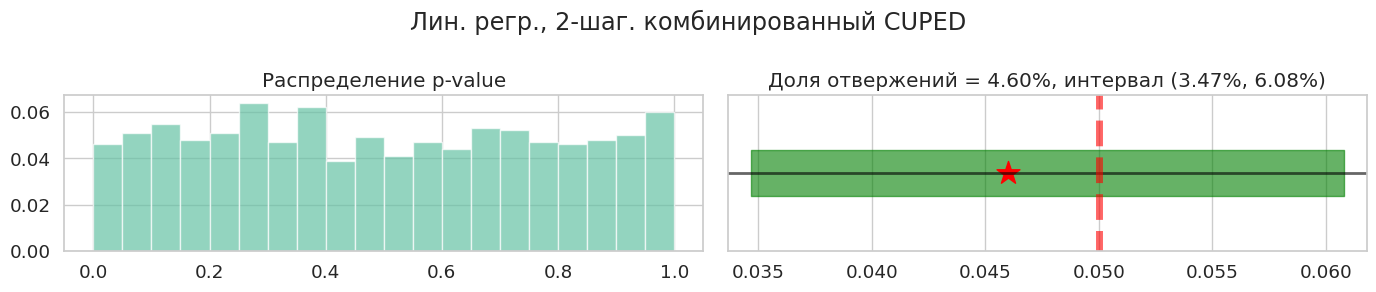

  0%|          | 0/1000 [00:00<?, ?it/s]

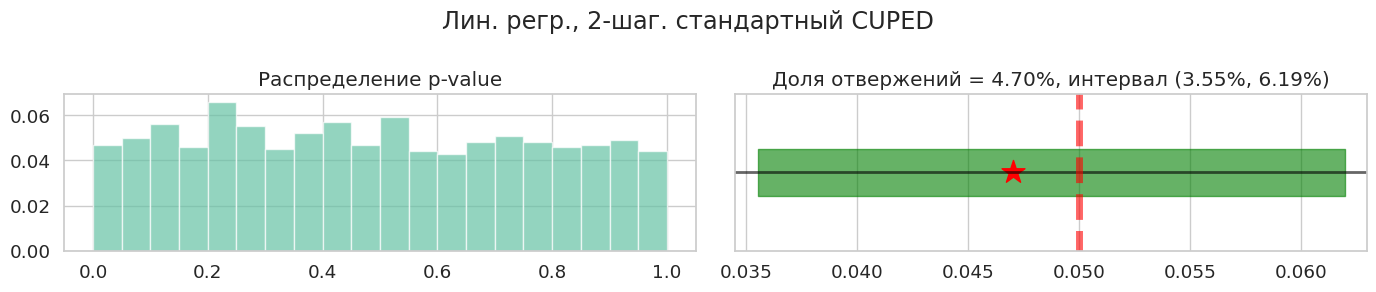

  0%|          | 0/1000 [00:00<?, ?it/s]

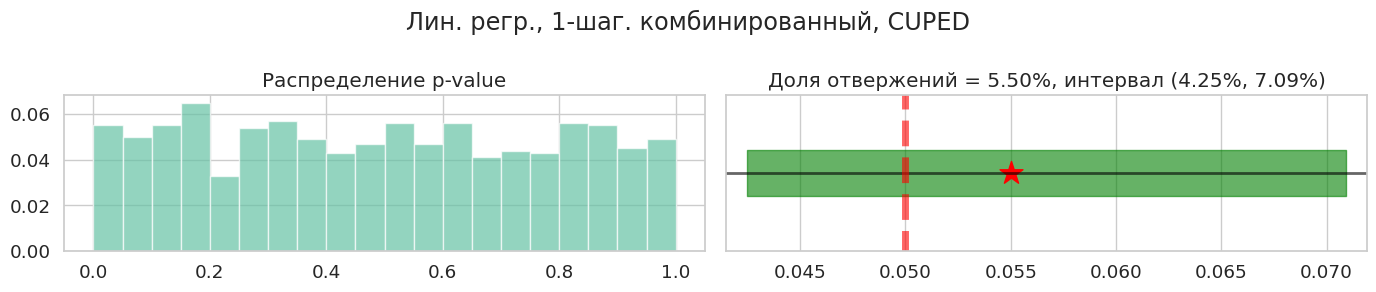

  0%|          | 0/1000 [00:00<?, ?it/s]

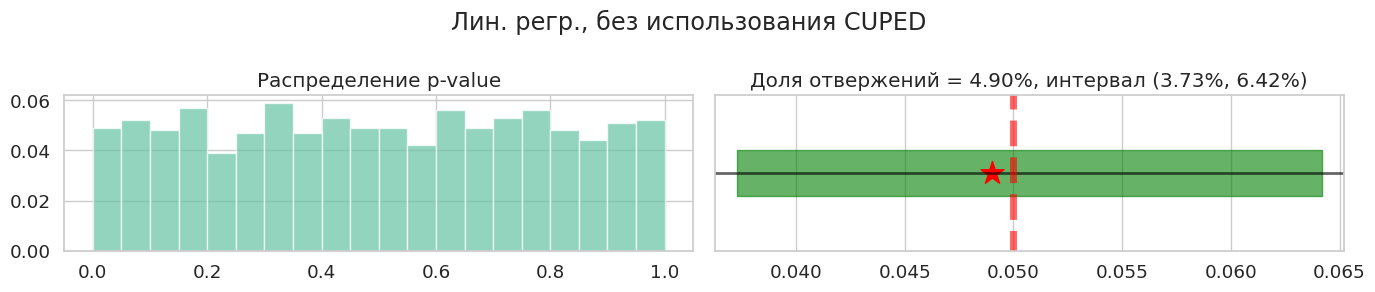

  0%|          | 0/1000 [00:00<?, ?it/s]

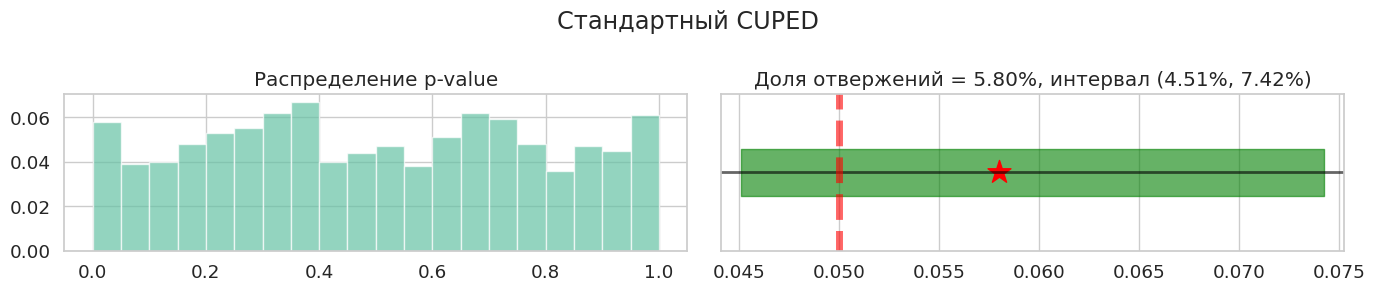

In [ ]:
test_list = [
    lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["prepilot"]),
    lambda x, y: regression_ttest_two_step_standart(x, y, covariate_names=["prepilot"]),
    lambda x, y: regression_ttest_one_step_comb(
        x, y, cuped=True, covariate_names=["prepilot"]
    ),
    regression_ttest_one_step_comb,
    cuped_ttest,
]

title_list = [
    "Лин. регр., 2-шаг. комбинированный CUPED",
    "Лин. регр., 2-шаг. стандартный CUPED",
    "Лин. регр., 1-шаг. комбинированный, CUPED",
    "Лин. регр., без использования CUPED",
    "Стандартный CUPED",
]

for test, title in zip(test_list, title_list):
    run_experiments(
        test=test,
        generate_samples=lambda size: generate_two_independent_samples(
            sample_size=size,
            generate_train_test_func=generate_nonlinear_train_test_sample,
        ),
        sample_size=sample_size,
        n_iter=n_iter,
        draw=True,
        title=title,
    )

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

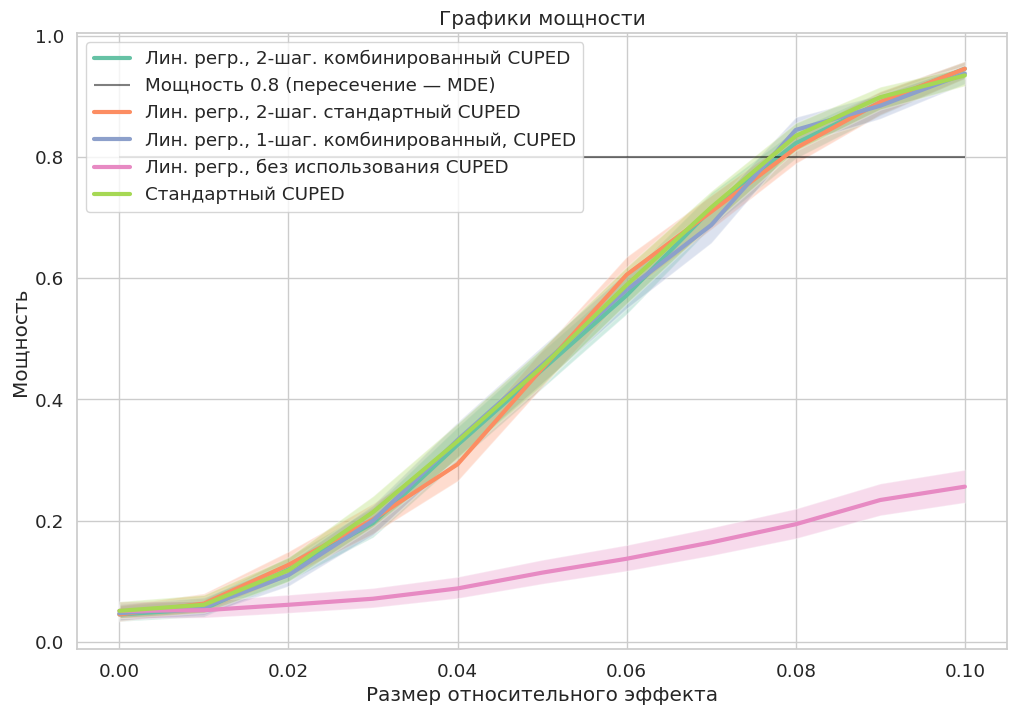

In [ ]:
for i, (test, title) in enumerate(zip(test_list, title_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples=lambda size: generate_two_independent_samples(
            sample_size=size,
            generate_train_test_func=generate_nonlinear_train_test_sample,
        ),
        sample_size=sample_size,
        n_iter=n_iter,
    )

    draw_power(powers, left_bounds, right_bounds, label=title, new_figure=(i == 0))

**Выводы**

Все методы с любыми данными корректно поддерживают уровень значимости ошибки первого рада.

Мощность методов, в которых используется линейная регрессия оказалась значительно больше, чем метода без нее.

Заметим, что мощности методов с линейной регрессией сопоставимы по мощности.

В случае гетероскедастичных данных методы хоть и отрабатывают, но желаемое MDE достигается при большем значении эффекта.

## Стратификация

---
### Задача 4.

Пусть в общей совокупности данных имеется $K$ страт, причем вес страты $k \in \{1, ..., K\}$ равен $w_k$, где $w_1+...+w_K=1$. Пусть также выборка размера $n$ выбрана случайно, то есть вероятность выбрать элемент из страты $k$ равна $w_k$.

Посчитайте $\mathsf{E} \frac{1}{n_k}$ с точностью до $o(1/n^2)$, где $n_k$ &mdash; количество элементов выборки из страты $k$.

*Указание.* Разложите по Тейлору функцию $f(x)=1/x$ в точке $x_0\not=0$.

$\square$

Заметим, $n_k \sim Bin(n, \omega_k)$. Будем раскладывать $\frac{1}{n_k}$ в точке $En_k = n\omega_k = n_0$

Тогда:
$$
\frac{1}{n_k} = \frac{1}{n_0} - \frac{1}{n_0^2}(n_k - n_0) + \frac{1}{n_0^3}(n_k - n_0)^2 - \frac{1}{2 \eta}\frac{(n_k - n_0)^3 }{n_0^4}
$$

В худшем случае $\eta = n \cdot \omega_k$

Так как $En_k = n \omega_k, Dn_k = n \omega_k (1  \omega_k)$, то по ЦПТ $n_k - n_0 \sim O\sqrt{(n)}$

Откуда:

$$
E\frac{1}{n_k} = \frac{1}{n_0} - \frac{1}{n_0^2}(n_0 - n_0) + \frac{D(n_k)}{n_0^3} + o(1 / n^2) = \frac{1}{n_0} + \frac{n_0 \cdot (1 - \omega_k)}{n_0^3} + o(1 / n^2) = \boxed{\frac{\omega_k(n-1) + 1}{n^2 \omega_k^2}}
$$

Внизу небольшой числовой эксперимент

$\blacksquare$

In [ ]:
import numpy as np
from math import factorial

p = 0.333
N = 100
results = []
for _ in range(100000):
    X = np.random.binomial(1, p=p, size=N)
    results.append(1 / np.sum(X))

theory_result = np.pow(1 - p, N)
for l in range(1, N):
    theory_result += (
        factorial(N)
        / (factorial(l) * factorial(N - l))
        * np.pow(p, l)
        * np.pow(1 - p, N - l)
    ) / l

theory_result = (p * (N - 1) + 1) / (N * N * p * p)
print("Практика: ", np.mean(results))
print("Теория: ", theory_result)
print("Разница: ", (np.mean(results) - theory_result) < 1 / np.pow(N, 2))

Практика:  0.030684530763397593
Теория:  0.030631532433334233
Разница:  True


---
### Задача 5.

Пусть $Y_1, ..., Y_n$ &mdash; выборка целевого признака, а $X_1, ..., X_n$ &mdash; соответствующая выборка ковариат. Пусть также все объекты делятся на $K$ страт. Получите формулу значения $\theta$ в методе CUPED при использовании стратифицированного среднего в случае
* стратифицированного семплирования,
* случайного семплирования.

$\square$

2) Cлучайное сэмплирование.

Далее, всюда нижний индекс у Y и X будет обозначать страту, к которой они принадлежат.

Пусть $\{\omega_j\}^K_{j=1}$ -- веса страт


Запишем стандартную процедуру CUPED, c учетом стратифицированного среднего.

$z = \sum\limits^{K}_{j=1} \omega_j \overline{Y_j} - \theta \left(\sum\limits^{K}_{j=1}\omega_j \overline{X_j} - \sum\limits^{K}_{j=1} \omega_j \mu_j\right)$

Тогда
\begin{align*}
Dz =& D\sum\limits^{K}_{j=1}\omega_j (\overline{Y_j} - \theta \overline{X_j}) \\
=& \sum\limits^{K}_{j, i=1} \omega_j \omega_i \text{cov}(\overline{Y_j} - \theta \overline{X_j}, \overline{Y_i} - \theta \overline{X_i}) \\
=& \theta^2 \sum\limits^{K}_{j, i=1}\omega_j \omega_i \text{cov}({\overline{X_j}, \overline{X_i}}) - \\
-& 2\theta \sum\limits^{K}_{j, i=1}\omega_j \omega_i \text{cov}({\overline{X_j}, \overline{Y_i}}) + \\
+& \sum\limits^{K}_{j, i=1}\omega_j \omega_i \text{cov}({\overline{Y_j}, \overline{Y_i}}) 
\end{align*}

Откуда:
$$
\theta_{\min} = \frac{\sum\limits^{K}_{j,i=1} \omega_j \omega_i \, \text{cov}(\overline{X_j}, \overline{Y_i})}{\sum\limits^{K}_{j,i=1} \omega_j \omega_i \, \text{cov}(\overline{X_j}, \overline{X_i})}
$$

Считая, что элементы из разных страт независимы, получим:
$$
\boxed{
\theta_{min} = \frac{\sum\limits^{K}_{j=1}\omega_j^2 \text{cov}({\overline{X_j}, \overline{Y_j}})}{\sum\limits^{K}_{j}\omega_j^2 \text{cov}({\overline{X_j}, \overline{X_j}})} 
= \frac{\sum\limits^{K}_{j=1}\frac{\omega_j^2}{n_j} \text{cov}(X_j^1, Y_j^1)}{\sum\limits^{K}_{j}\frac{\omega_j^2}{n_j} D(X_j^1)} 
}
$$

В случае случайного сэмплирования $\omega_j$ -- доля элементов j-й страты в выборке

1. Стратифицированное сэмплирование.

Заметим, что в виду стратифицированного сэмплирования $\omega_j = \frac{n_j}{n}$. Тогда ответ можно упростить:.

$$
\boxed{
\theta_{min} = \frac{\sum\limits^{K}_{j=1}\omega_j^2 \text{cov}({\overline{X_j}, \overline{Y_j}})}{\sum\limits^{K}_{j}\omega_j^2 \text{cov}({\overline{X_j}, \overline{X_j}})} 
= \frac{\sum\limits^{K}_{j=1}{\omega_j n} \cdot \text{cov}(X_j^1, Y_j^1)}{\sum\limits^{K}_{j}\omega_j n \cdot D(X_j^1)}
=\frac{\sum\limits^{K}_{j=1}{\omega_j } \cdot \text{cov}(X_j^1, Y_j^1)}{\sum\limits^{K}_{j}\omega_j \cdot D(X_j^1)}
}
$$


---
### Задача 6.

Рассмотренные нами методы стратификации работают в случае стратифицированного семплирования, либо же случайного семплирования. Во втором случае метод называется постстратификацией. Однако, как мы видели на занятии, при наличии сильных перекосов в соотношении между стратами вероятность ошибки 1 рода может сильно увеличиваться.

Промоделируйте распределение разности 
* обычного среднего
* стратифицированного среднего

при наличии сильных перекосов в соотношении между стратами и проинтерпретируйте результаты.

Код для семплирования перекошенных данных и для семплирования разности средних есть в ноутбуке с занятия.

In [ ]:
def generate_mix_expon(sample_sizes=[1000, 100], scale=[1, 10]):
    ''' Генерация выборки из смеси двух экспоненциальных распределений. '''
    
    x1 = np.random.exponential(size=sample_sizes[0], scale=scale[0])
    x2 = np.random.exponential(size=sample_sizes[1], scale=scale[1])

    x1 = pd.DataFrame(x1, columns=['value'])
    x1['strat'] = 0
    x2 = pd.DataFrame(x2, columns=['value'])
    x2['strat'] = 1
    return pd.concat([x1, x2])

def stratified_mean(y, strats=None):
    '''Вычисляет стратифицированное среднее.'''
    group_means = y.groupby('strat')['value'].mean()
    strat_mean_val = 0
    if len(group_means) == 2:
        strat_mean_val = (group_means * strats).sum()
    else :
        strat_mean_val = group_means[0]
    return strat_mean_val

  0%|          | 0/5000 [00:00<?, ?it/s]

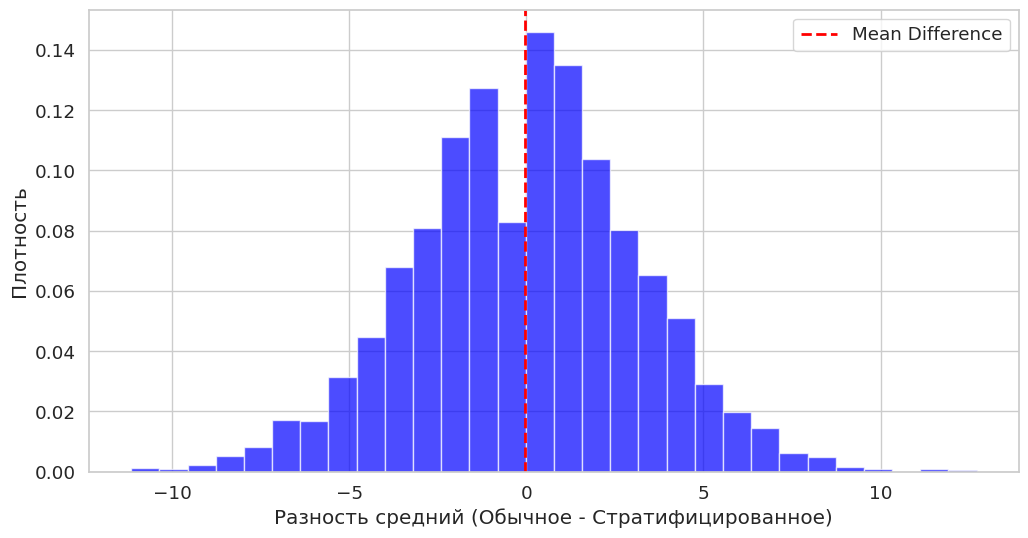

In [ ]:
sample_sizes = np.array([600, 400])

diffs = []
data = generate_mix_expon(sample_sizes=sample_sizes, scale=[1, 100])
strats = sample_sizes / sample_sizes.sum()

for _ in tqdm(range(n_trials)):
    sample = data.sample(n=sample_size, replace=True)  # Бутстрэп выборки
    mean_regular = sample['value'].mean()
    mean_stratified = stratified_mean(sample, strats)
    diffs.append(mean_regular - mean_stratified)

fig = plt.figure(figsize=(12, 6))
plt.hist(diffs,bins=30, density=True, alpha=0.7, color='b')
plt.axvline(np.mean(diffs), color='r', linestyle='dashed', linewidth=2, label="Mean Difference")
plt.xlabel("Разность средний (Обычное - Стратифицированное)")
plt.ylabel("Плотность")
plt.legend()
plt.show()

В виду больших размеров страт, сопостовимых пропорций и ЦПТ их разность стремится к нормальному распределению. 

В чем же тогда проблема того, что стратифицированный t-test увеличивает вероятность ошибки 1 рода?

Потому что мы вносим зависимость когда выполняем t-test внутри страт. Но тогда, при совмещении этих оценок мы искусственно занижаем дисперсию итоговой статистики, из-за чего увеличивается вероятность ошибки первого рода.

Также стоит отметить, что размеры страт меньше, чем самой выборки, из за чего вероятность ошибки первого рода также возрастает

Можно ли как-то исправить его с помощью некоторой универсальной статистической процедуры?

Можно применить бутстреп, в котором мы сохраним структуру страт, что может скорретировать стандратные ошибки.

Реализуйте эту процедруру.

In [ ]:
def bootstrap_sample(x):
    return np.random.choice(x, size=len(x), replace=True)

def stratified_bootstrap_ttest(data, value_col, group_col, stratum_col, ttest=sps.ttest_ind, n_iter=10000, alpha=0.05):
    strata = data[stratum_col].unique()
    groups = data[group_col].unique()
    if len(groups) != 2:
        raise ValueError("Функция поддерживает только две группы.")
    
    bootstrap_info = {"pvals": [], "stats": []}
    
    for _ in tqdm(range(n_iter)):
        boot_group_stats = []
        boot_group_sizes = []
        
        for s in strata:
            subset = data[data[stratum_col] == s]
            x = subset[subset[group_col] == groups[0]][value_col].values
            y = subset[subset[group_col] == groups[1]][value_col].values
            
            if len(x) > 0 and len(y) > 0:
                boot_x = bootstrap_sample(x)
                boot_y = bootstrap_sample(y)
                stat, _ = ttest(boot_x, boot_y)
                boot_group_stats.append(stat)
                boot_group_sizes.append(len(x) + len(y))
        
        if boot_group_stats:
            weighted_stat = np.average(boot_group_stats, weights=boot_group_sizes)
            bootstrap_info["stats"].append(weighted_stat)
    
    # Оригинальная t-статистика
    original_stats = []
    original_sizes = []
    for s in strata:
        subset = data[data[stratum_col] == s]
        x = subset[subset[group_col] == groups[0]][value_col].values
        y = subset[subset[group_col] == groups[1]][value_col].values
        if len(x) > 0 and len(y) > 0:
            stat, _ = ttest(x, y)
            original_stats.append(stat)
            original_sizes.append(len(x) + len(y))
    
    original_stat = np.average(original_stats, weights=original_sizes)
    
    return bootstrap_info, original_stat

def get_bootstrap_CI(bootstrap_info, ci_type="two-sided", alpha=0.05):
    stats = np.array(bootstrap_info["stats"])
    
    if ci_type == "left":
        return (np.quantile(stats, alpha), np.quantile(stats, 1))
    elif ci_type == "right":
        return (np.quantile(stats, 0), np.quantile(stats, 1 - alpha))
    else:
        return (np.quantile(stats, alpha / 2), np.quantile(stats, 1 - alpha / 2))

def get_bootstrap_pval(bootstrap_info, observed_stat, pval_type="two-sided"):
    stats = np.array(bootstrap_info["stats"])
    
    if pval_type == "left":
        return np.mean(observed_stat > stats)
    elif pval_type == "right":
        return np.mean(observed_stat < stats)
    else:
        return 2 * min(
            np.mean(observed_stat < stats), np.mean(observed_stat > stats)
        )

def bootstrap_ttest(
    x,
    y,
    bootstarp_info,
    ttest=sps.ttest_ind,
    alpha=0.05,
    ci_type="two-sided",
    pval_type="two-sided",
):
    original_stat, original_pval = ttest(x, y)
    ci = get_bootstrap_CI(bootstarp_info, ci_type, alpha)
    pval = get_bootstrap_pval(bootstarp_info, original_stat, pval_type)

    return original_stat, pval, ci

def print_bootstrap_results(original_stat, pval, ci):
    print("Результаты стратифицированного бутстрепного t-теста:")
    print(f"Оригинальная t-статистика: {original_stat:.4f}")
    print(f"Бутстреп p-value: {pval:.4f}")
    print(f"Доверительный интервал: ({ci[0]:.4f}, {ci[1]:.4f})")


In [ ]:
x = generate_mix_expon(sample_sizes=[1000, 100], scale=[1, 15])
y = generate_mix_expon(sample_sizes=[1000, 100], scale=[1.2, 14])

x['group'] = 0
y['group'] = 1
data = pd.concat([x, y])

In [ ]:
bootstrap_info_abs, original_stat_abs= stratified_bootstrap_ttest(
    data, "value", "group", "strat", ttest=sps.ttest_ind, n_iter=10000
)

  0%|          | 0/10000 [00:00<?, ?it/s]

Посмотрим на полученное распределение

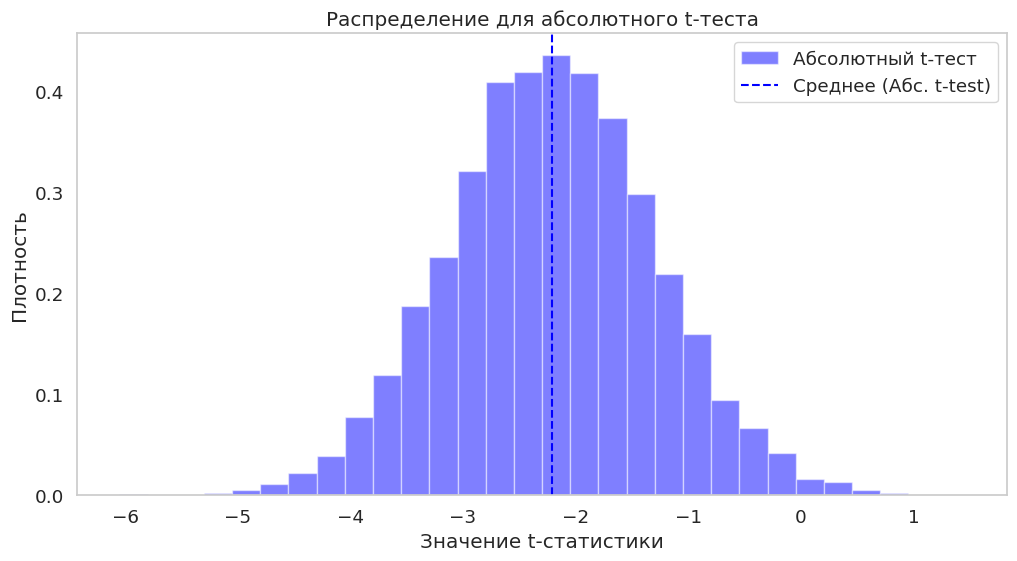

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(bootstrap_info_abs["stats"], bins=30, density=True, alpha=0.5, color="blue", label="Абсолютный t-тест")
plt.axvline(np.mean(bootstrap_info_abs["stats"]), color="blue", linestyle="--", label="Среднее (Абс. t-test)")
plt.title("Распределение для абсолютного t-теста")
plt.xlabel("Значение t-статистики")
plt.ylabel("Плотность")
plt.legend()
plt.grid()

Провалидируйте полученный тест, а также сравните его по мощности со стандартным t-test. Используйте код с занятий.

Для начала сравним контроль ошибки первого рода для обычно t-test и стратифицированного.

In [ ]:
def draw_interval(
    real_alpha, left_alpha, right_alpha, 
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''
    
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(6, 2))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_alpha, right_alpha], [0.15]*2, [-0.15]*2, 
            color='green', alpha=0.6
        )
        plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
        plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_alpha:.2f}%, {100*right_alpha:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def calculate_real_alpha(n_errors, n_iter):
    '''
    Оценка реального уровня значимости и его дов. интервала.
    
    Аргументы:
    n_errors -- количество ошибок в эксперименте
    n_iter -- количество экспериментов
    
    Возвращает:
    real_alpha -- оценка реального уровня значимости
    left_alpha, right_alpha -- границы соотв. дов. интервала
    '''
    
    real_alpha = n_errors / n_iter
    left_alpha, right_alpha = proportion_confint(n_errors, n_iter, method='wilson')
    
    return real_alpha, left_alpha, right_alpha

def run_experiments(
    test, generate_sample_x, generate_sample_y=None, 
    n_iter=10000, sample_size=1000, alpha=0.05
):
    '''
    Проведение серии AA-тестов на искусственных выборках.
    
    Аргументы:
    test -- статистический критерий
    generate_sample_x, generate_sample_y -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    '''
    
    if generate_sample_y is None:
        generate_sample_y = generate_sample_x

    n_errors = 0  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        x = generate_sample_x(size=sample_size)["value"]
        y = generate_sample_y(size=sample_size)["value"]
        n_errors += test(x, y)

    # Реальный уровень значимости
    real_alpha, left_alpha, right_alpha = calculate_real_alpha(n_errors, n_iter)
    draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Стратифицированный бутстрепный t-тест


  0%|          | 0/1000 [00:00<?, ?it/s]

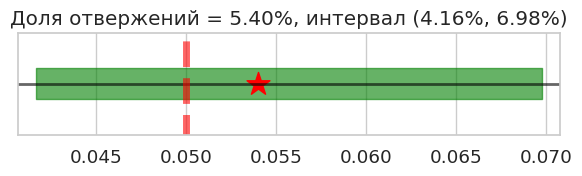

Обычный t-тест


  0%|          | 0/1000 [00:00<?, ?it/s]

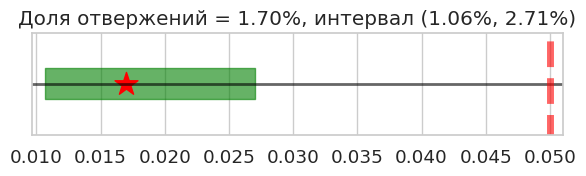

In [ ]:
test_list = [
    lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs),
    sps.ttest_ind,
]

title_list = [
    "Стратифицированный бутстрепный t-тест",
    "Обычный t-тест",
]
# x_data, y_data, theta = cuped_transform(x_data, y_data, return_theta=True)

print("Стратифицированный бутстрепный t-тест")
run_experiments(
    test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs, sps.ttest_ind)[0]
    < alpha,
    generate_sample_x=lambda size: generate_mix_expon(
        sample_sizes=[1000, 100], scale=[1, 15]
    ),
    generate_sample_y=lambda size: generate_mix_expon(
        sample_sizes=[1000, 100], scale=[1.2, 10]
    ),
    sample_size=sample_size,
    n_iter=n_iter,
)

print("Обычный t-тест")
run_experiments(
    test=lambda x, y: sps.ttest_ind(x, y)[1] < alpha,
    generate_sample_x=lambda size: generate_mix_expon(
        sample_sizes=[1000, 100], scale=[1, 15]
    ),
    generate_sample_y=lambda size: generate_mix_expon(
        sample_sizes=[1000, 100], scale=[1.2, 14]
    ),
    sample_size=sample_size,
    n_iter=n_iter,
)

Теперь посмотрим на мощность.

In [ ]:
def run_experiments(test, generate_sample_x, generate_sample_y, add_effect, data=None, effects=[0],
            n_iter=10000, alpha=0.05):    
    '''
    Проведение серии AB-тестов:
        * либо на исторических данных data
        * либо на искусственных данных
   
    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    data -- исторические данные, на которых запускаем АА-тест. 
        None, если используем искусственные данные
    effect_arr -- массив искусственно добавляемых эффектов
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    '''

    n_rejects = np.zeros(len(effects))  # количество отвержений H_0

    # Проведение экспериментов
    for num_effect, effect in tqdm(enumerate(effects)):
        for _ in range(n_iter):
            # Генерируем выборки
            x = generate_sample_x()["value"]
            y = generate_sample_y()["value"]
            # Добавляем эффект
            x = add_effect(x, effect)    
            # Применияем критерий
            n_rejects[num_effect] += (test(x, y)[1] < alpha)

    # Реальная мощность
    real_power, left_power, right_power = estimate_reject_prob(n_rejects, n_iter)
    # Отрисовка мощности
    draw_power(effects, real_power, left_power, right_power)
    return real_power, (left_power, right_power)


def add_effect(x, effect):
    '''
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект
    
    Возвращает:
    x -- выборка с добавленным эффектом
    '''
    
    x += effect + np.random.uniform(-effect / 5, effect/5)
    return x


def draw_power(effects, real_power, left_power, right_power, title='График мощности'):
    '''
    Построение и отрисовка графика мощности критерия.
   
    Аргументы:
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    '''

    plt.figure(figsize=(10, 4))
    plt.plot(effects, real_power, color='blue', label='Мощность')
    plt.fill_between(effects, left_power, right_power, alpha=0.3, color='blue', 
                     label='Дов. интервал мощности')
    plt.hlines(0.8, effects[0], effects[-1], color='black',
               label='Мощность 0.8 (пересечение - MDE)')
    plt.legend()
    plt.xlabel('Размер эффекта')
    plt.ylabel('Мощность')
    plt.title(title)
    plt.show()

Cтратифицированный бутстрепный t-тест


0it [00:00, ?it/s]

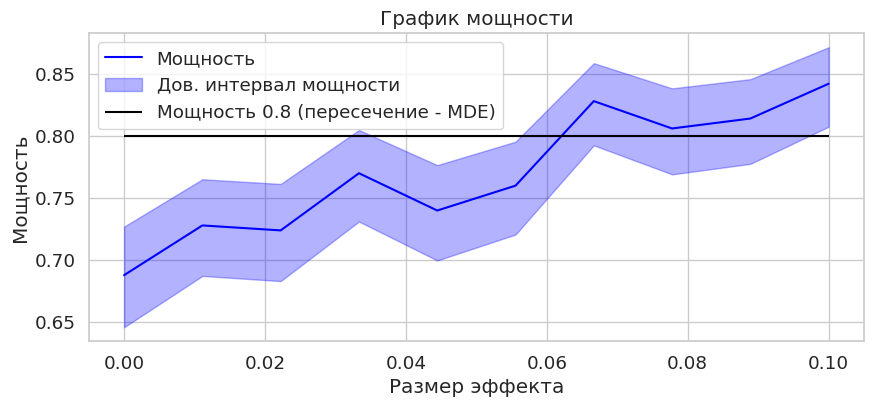

In [ ]:
print("Cтратифицированный бутстрепный t-тест")

run_experiments(
    test=lambda x, y: bootstrap_ttest(x, y, bootstrap_info_abs, sps.ttest_ind),
    generate_sample_x=lambda : generate_mix_expon(
        sample_sizes=[1000, 100], scale=[1, 15]
    ),
    generate_sample_y=lambda : generate_mix_expon(
        sample_sizes=[1000, 100], scale=[1, 15]
    ),
    effects=np.linspace(0, 0.1, 10),
    add_effect=add_effect,
    n_iter=500,
    alpha=alpha,
);

Обычный бутстрепный t-тест


0it [00:00, ?it/s]

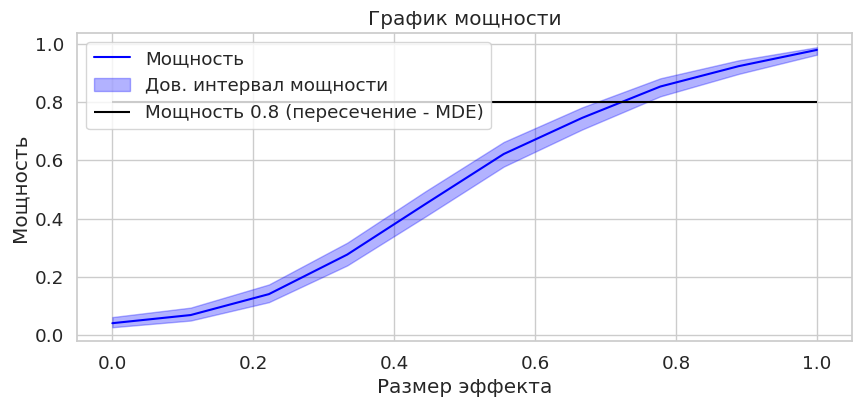

In [ ]:
print("Обычный бутстрепный t-тест")

run_experiments(
    test=lambda x, y: sps.ttest_ind(x, y),
    generate_sample_x=lambda : x.sample(n=len(x), replace=True),
    generate_sample_y=lambda : y.sample(n=len(y), replace=True),
    effects=np.linspace(0, 1, 10),
    add_effect=add_effect,
    n_iter=500,
    alpha=alpha,
);

**Выводы**

Мы показали, что разность среднего и стратифицированного среднего при большой выборке в силу ЦПТ совпадает с нормальным распределением.

Мы написали стратифицированный бутстрепный критерий, который может контроллировать ошибку первого рода, и при этом обладает высокой мощностью. Таким образом была решена проблема с увеличением ошибки первого рода при стратификации.